# Sample of Diverging Colourmaps

Generates a list of RGBA colours from a Matplotlib colourmap and a positive and negative range of nubers, then plots as a list of colour patches.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.patches import Rectangle
import colorcet as cc
import my_cmaps

In [2]:
def get_z(level, min_level, max_level):
    '''
    Returns a float between 0 and 1 indicating the point where "level" falls on 
    a diverging colourmap.

    The min_level should be below zero, the max_level above zero, i.e.,
    if level = min_level, then z = 0 
    if level = max_level, then z = 1

    The diverging colour map will always be segregated above and below zero correctly.

    This means that a level = 0 will always return z = 0.5 (i.e., indicating the mid-point of the colourmap), and
    for level values below zero, z is between 0 and 0.5; for level values above zero, z is between 0.5 and 1.

    '''
    min_z = min_level
    min_range = min_z - 0
    max_z = max_level
    max_range = max_z - 0
    
    if level <=0:
        
        z = level / min_z
        
        if z < min_z:
            z=-1
            
        z = 0.5 - z*0.5
        
    else:
        z = level / max_z
        
        if z > max_z:
            z = 1
            
        z = 0.5 + z*0.5
       
    return z

min_level = -100
max_level = 200

print("Min, Mid (Zero), Max")
print(get_z(-100, min_level, max_level))
print(get_z(0, min_level, max_level))
print(get_z(200, min_level, max_level))

print("Min -- > Mid (Zero)")
for i in range(-100, 0, 20):
    print(get_z(i, min_level, max_level))
    
print("Mid (Zero) --> Max")
for i in range(0, 200, 20):
    print(get_z(i, min_level, max_level))


Min, Mid (Zero), Max
0.0
0.5
1.0
Min -- > Mid (Zero)
0.0
0.09999999999999998
0.2
0.3
0.4
Mid (Zero) --> Max
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [3]:
def get_colour_list(cmap, levels):
    '''
    Returns a list of rgba colours, selected from cmap, with each list item
    associated to a level from a list of levels.
    
    Here's an example to help:

    get_colour_list("Spectral", [-20, -10, 0, 10, 20])
    
    will return this list, with each item (row) including a level and the rgba colour tuple: 
    
[[-20, (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)],
 [-10, (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0)],
 [0, (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)],
 [10, (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0)],
 [20, (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]]
 
    '''
    
    # pass either a string name of a colour map or a cmap object
    if isinstance(cmap, str):
        cmap = cm.get_cmap(cmap)
    
    colour_list = []
    for level in levels:
        # get z value between 0 and 1
        z = get_z(level, min(levels), max(levels))
        # get rgba from cmap and append to list
        rgba = cmap(z)
        colour_list.append([level, rgba])

    return colour_list

In [4]:
cmap = 'Spectral'
cmap = cm.get_cmap(cmap)
levels = list(range(-20,21,10))  
print(levels)
colour_list = get_colour_list(cmap, levels)
colour_list

[-20, -10, 0, 10, 20]


[[-20, (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)],
 [-10, (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0)],
 [0, (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)],
 [10, (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0)],
 [20, (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]]

In [5]:
def print_colourtable(colours, title="", level_add_100=False, colours_x_255=False):
        
        print(title)
        for i, (name, colour) in enumerate(colours):
            if level_add_100 is True:
                name = name+100
            if colours_x_255 is True:
                colour = tuple([int(x*255) for x in colour])
            full_text = f"{name}, {colour}"
            print(full_text)
        
        print("-" * 100)
        
        return None
    

In [6]:
def plot_colourtable(colours, title, emptycols=0, level_add_100=False, colours_x_255=False, print_colours=False):
    '''
    Plots the colours 
    
    Adapted from:
    https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
    
    coloUrs       : A list of (level, (colour tuples))
    title         : String title for plotting / printing 
    level_add_100 : True will add 100 to the levels (to move from using anomaly as % of normal to % above 0)
    colours_x_255 : True will multiply RGBA colours by 255 (i.e., from fraction btwn 0 to 1, to 0 to 255 int) 
    print_colours : True prints a text list of the levels colours in addition to plotting
    '''
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    n = len(colours)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)
    
    for i, (name, colour) in enumerate(colours):

        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7
        #full_text = f"{name}, {mcolors.to_hex(color)}"
        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colour, edgecolor='0.7'))
        
        if level_add_100 is True:
            name = name+100
        if colours_x_255 is True:
            colour = tuple([int(x*255) for x in colour])
        full_text = f"{name}, {colour}"

        ax.text(text_pos_x, y, full_text, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')
    
    if print_colours is True:
        c = print_colourtable(colours, title, level_add_100=False, colours_x_255=False)


    return plt


BrBG
-100, (0.32941176470588235, 0.18823529411764706, 0.0196078431372549, 1.0)
-80, (0.5447135717031911, 0.31510957324106115, 0.038831218762014605, 1.0)
-60, (0.7490196078431373, 0.5058823529411764, 0.17647058823529413, 1.0)
-40, (0.8720492118415993, 0.7557862360630525, 0.4840445982314493, 1.0)
-20, (0.9647058823529412, 0.9098039215686274, 0.7647058823529411, 1.0)
0, (0.9572472126105345, 0.9599384851980008, 0.9595540176855056, 1.0)
25, (0.8723567858515957, 0.9396386005382545, 0.9300269127258747, 1.0)
50, (0.7803921568627453, 0.9176470588235294, 0.8980392156862746, 1.0)
75, (0.6384467512495198, 0.8596693579392543, 0.8260668973471743, 1.0)
100, (0.4961937716262979, 0.7997693194925032, 0.7530180699730875, 1.0)
125, (0.346251441753172, 0.6918108419838525, 0.653056516724337, 1.0)
150, (0.207843137254902, 0.592156862745098, 0.5607843137254902, 1.0)
175, (0.10388312187620148, 0.4941945405613226, 0.4628219915417148, 1.0)
200, (0.0038446751249519417, 0.3967704728950404, 0.36509034986543637, 1.0

<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

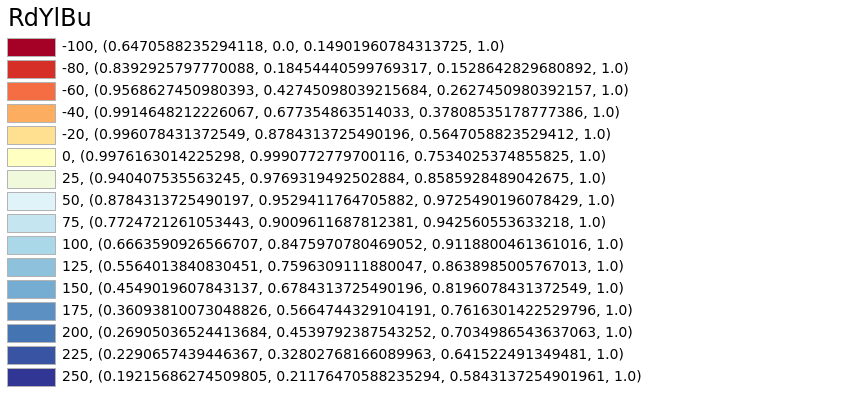

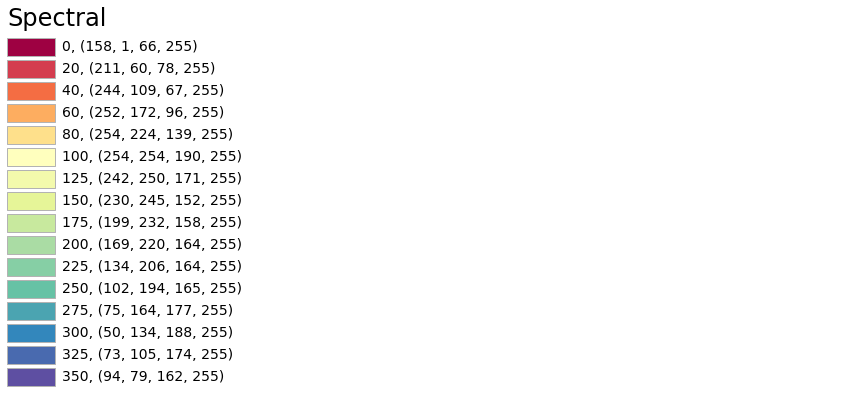

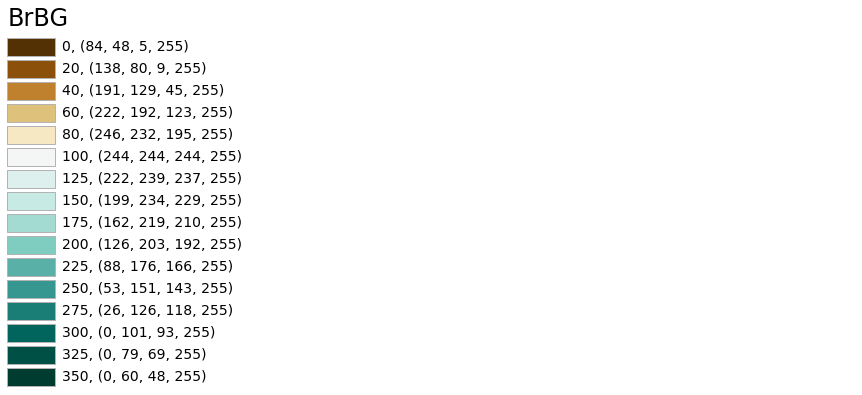

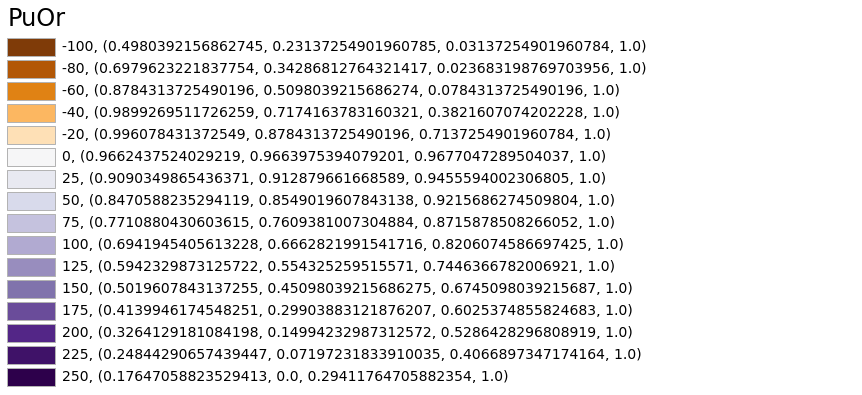

In [7]:
levels = list(range(-100,0,20)) + list(range(0,251,25))

# Matplotlib
cmap = 'RdYlBu'
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                emptycols=3)

# add 100 to the levels (this converts levels as anomaly % relative to normal, to % of normal)
# convert RGBA colours from values between 0 and 1 to values between 0 and 255
cmap = 'Spectral'
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                emptycols=3, level_add_100=True, colours_x_255=True)

# print the colours separate from the graph
cmap = 'BrBG'
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                emptycols=3, level_add_100=True, colours_x_255=True, print_colours=True)

cmap = 'PuOr'
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                emptycols=3)


<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

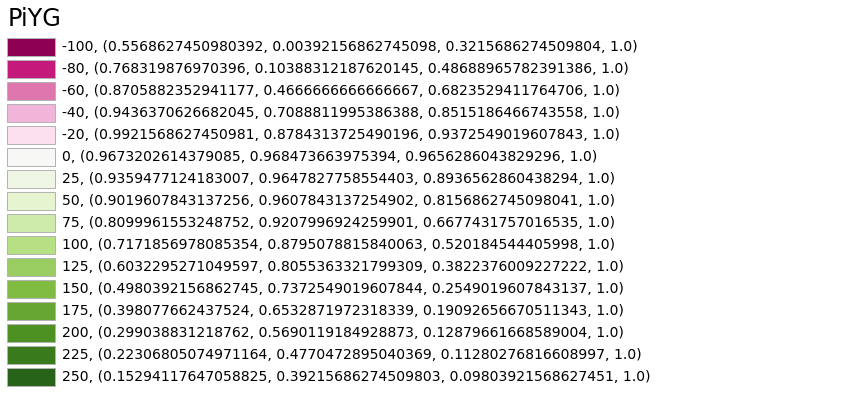

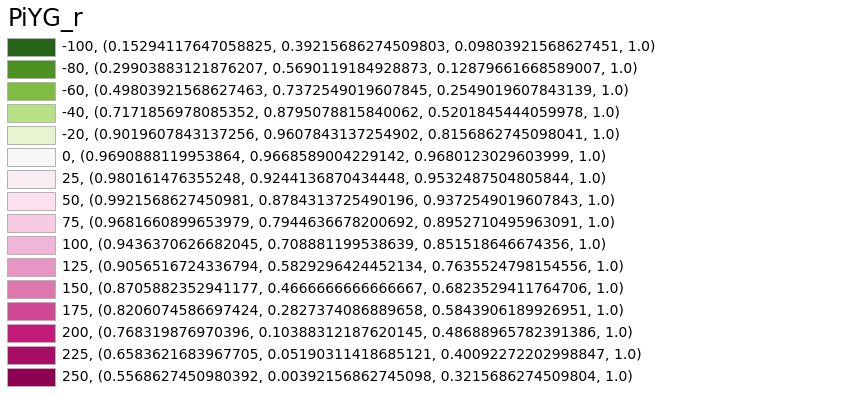

In [8]:
# Reverse by tacking on "_r"

# normal
cmap = 'PiYG'
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                emptycols=3)

# reversed
cmap = 'PiYG_r'
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                emptycols=3)



<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

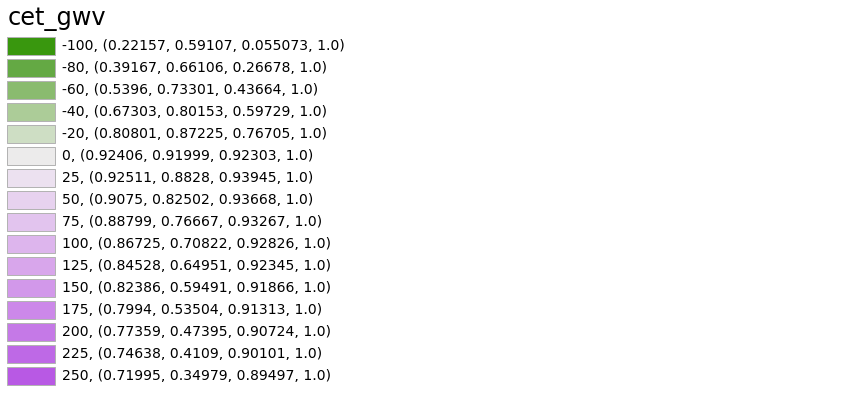

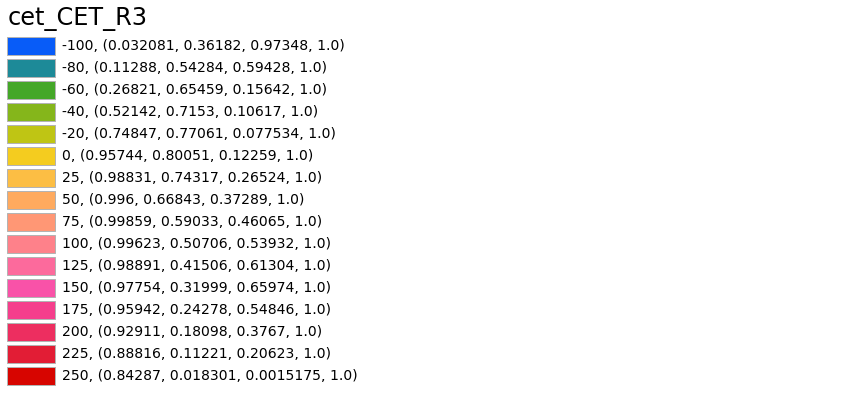

In [9]:
# colorcet examples 

# colorcet library must be installed and imported
# then palettes are available in matplotlib
# and can be accessed by appending
# "cet_" before palette name and the 

cmap = "cet_gwv"
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                 emptycols=3)

cmap = "cet_CET_R3"
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                 emptycols=3)


<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

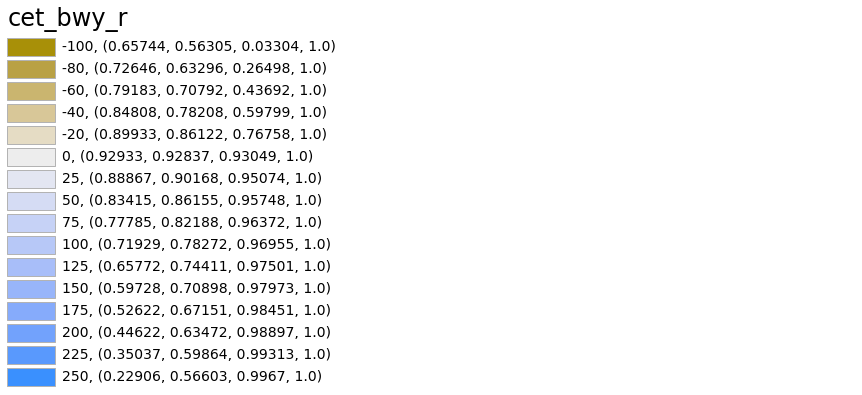

In [10]:
# Reversing with "_r" works on colorcet too
cmap = "cet_bwy_r"
colour_list = get_colour_list(cmap, levels)
plot_colourtable(colour_list, cmap,
                 emptycols=3)


<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

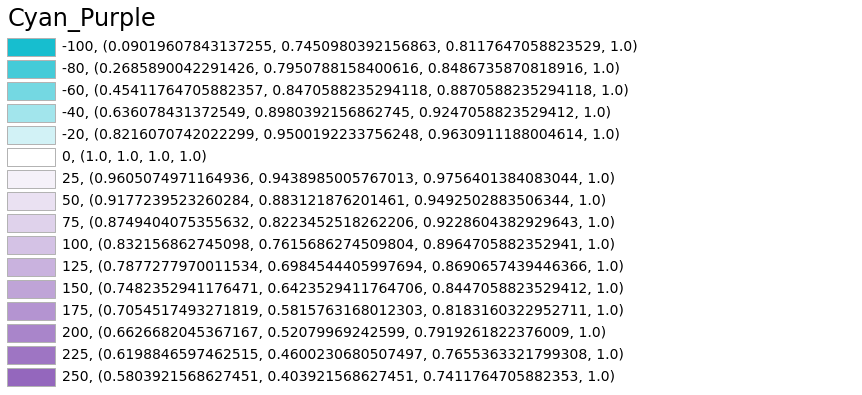

In [11]:
# Created a module my_cmaps with some functions and my own cmaps

# Use the functions in my_cmaps to create your own colourmaps

# create a diverging cmap from two colours
CyPu = my_cmaps.my_diverging_cmap("tab:cyan", "tab:purple", "Cyan_Purple")
colour_list = get_colour_list(CyPu, levels)
plot_colourtable(colour_list, CyPu.name,
                 emptycols=3)

<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

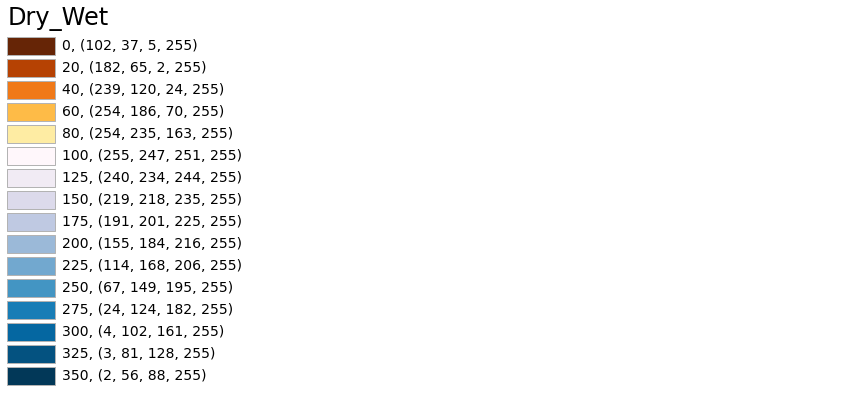

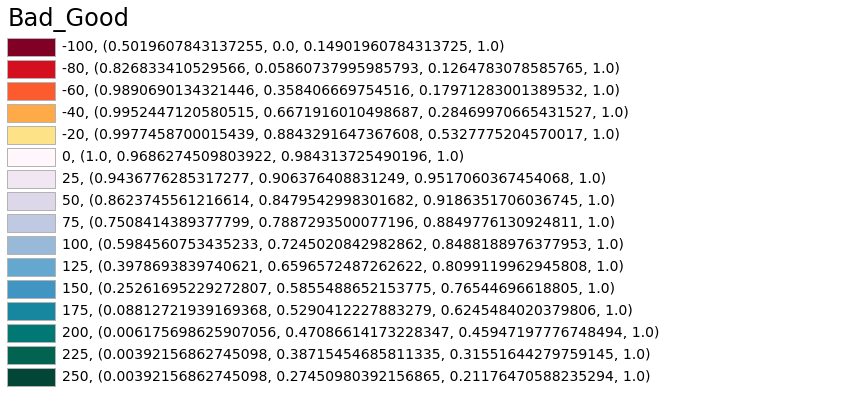

In [12]:
# create a colour map by combining two other colour maps
DryWet = my_cmaps.my_combined_cmap("YlOrBr_r", "PuBu", "Dry_Wet")
colour_list = get_colour_list(DryWet, levels)
plot_colourtable(colour_list, DryWet.name,
                emptycols=3, level_add_100=True, colours_x_255=True)

badgood = my_cmaps.my_combined_cmap("YlOrRd_r", "PuBuGn", "Bad_Good")
colour_list = get_colour_list(badgood, levels)
plot_colourtable(colour_list, badgood.name,
                 emptycols=3)

<module 'matplotlib.pyplot' from 'C:\\Users\\jacobb\\Miniconda3\\envs\\geo\\lib\\site-packages\\matplotlib\\pyplot.py'>

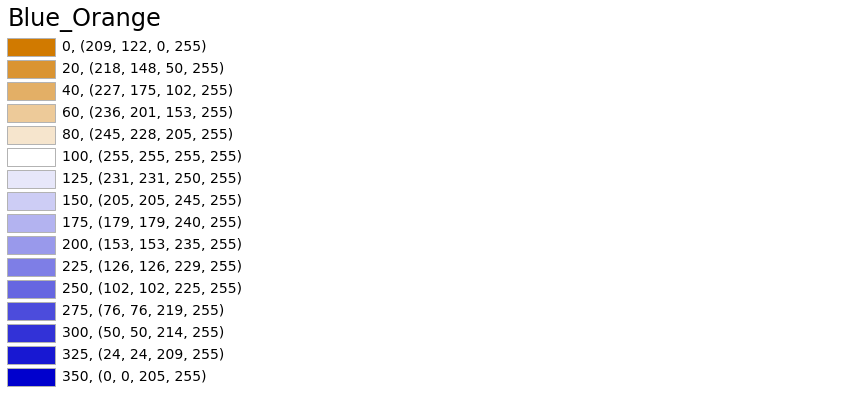

In [13]:
# create a diverging colourmap from two end colours
BlOr = my_cmaps.my_diverging_cmap("#d17a00", "mediumblue", "Blue_Orange")
colour_list = get_colour_list(BlOr, levels)
plot_colourtable(colour_list, BlOr.name,
                emptycols=3, level_add_100=True, colours_x_255=True)

Blue_Orange
-100, (0.8196078431372549, 0.47843137254901963, 0.0, 1.0)
-80, (0.8549788542868128, 0.5806997308727413, 0.19607843137254902, 1.0)
-60, (0.8917647058823529, 0.6870588235294117, 0.4, 1.0)
-40, (0.927843137254902, 0.7913725490196077, 0.6, 1.0)
-20, (0.9646289888504421, 0.8977316416762783, 0.803921568627451, 1.0)
0, (1.0, 1.0, 1.0, 1.0)
25, (0.9058823529411765, 0.9058823529411765, 0.9815455594002307, 1.0)
50, (0.803921568627451, 0.803921568627451, 0.9615532487504805, 1.0)
75, (0.7019607843137254, 0.7019607843137254, 0.9415609381007305, 1.0)
100, (0.6, 0.6, 0.9215686274509804, 1.0)
125, (0.49411764705882355, 0.49411764705882355, 0.9008073817762399, 1.0)
150, (0.4, 0.4, 0.8823529411764706, 1.0)
175, (0.2980392156862745, 0.2980392156862745, 0.8623606305267205, 1.0)
200, (0.19607843137254902, 0.19607843137254902, 0.8423683198769705, 1.0)
225, (0.09411764705882353, 0.09411764705882353, 0.8223760092272203, 1.0)
250, (0.0, 0.0, 0.803921568627451, 1.0)
---------------------------------

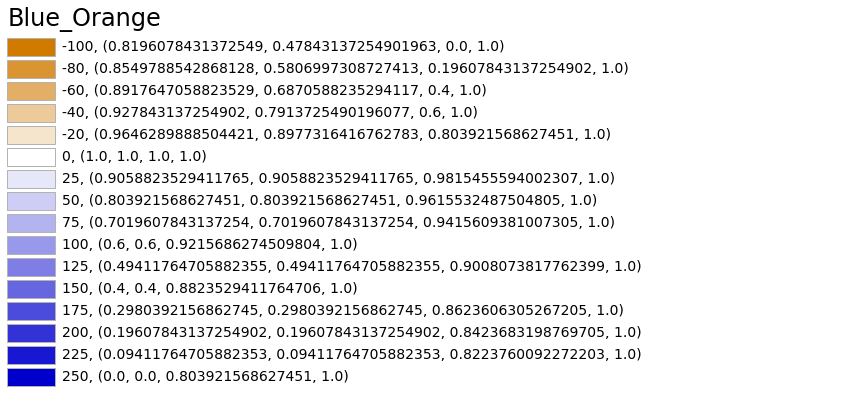

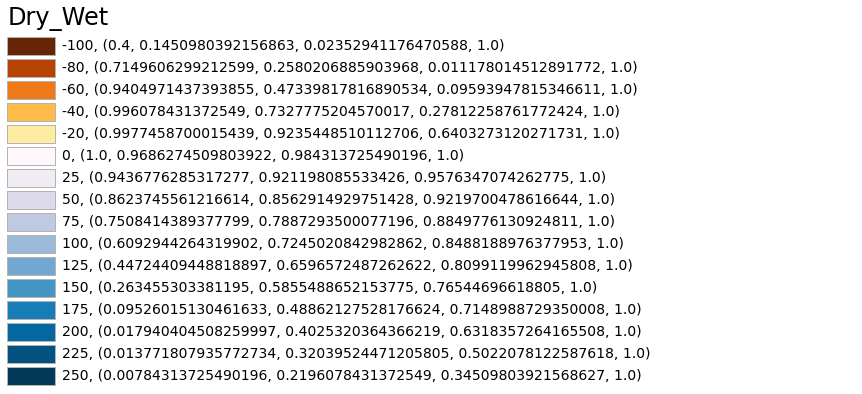

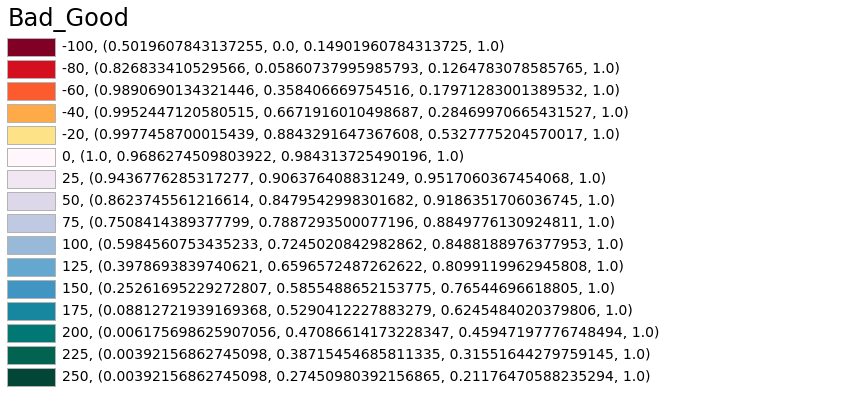

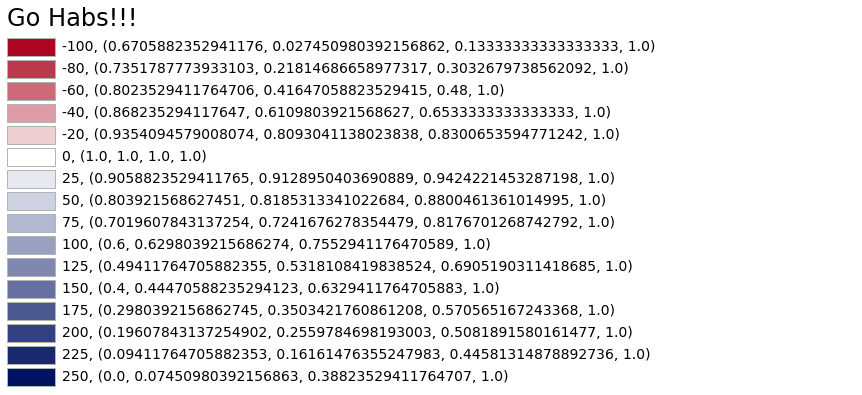

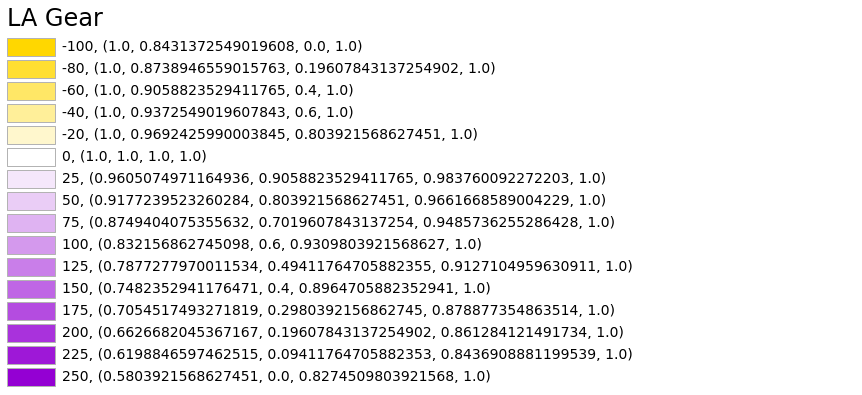

In [14]:
# alternatively, some colour maps are callable from my_cmaps directly
for cmap in my_cmaps.mine:
    colour_list = get_colour_list(cmap, levels)
    plot_colourtable(colour_list, cmap.name,
                     emptycols=3, print_colours=True)